In [ ]:
# The code below was used to perform the simulations and create the diagrams for the paper

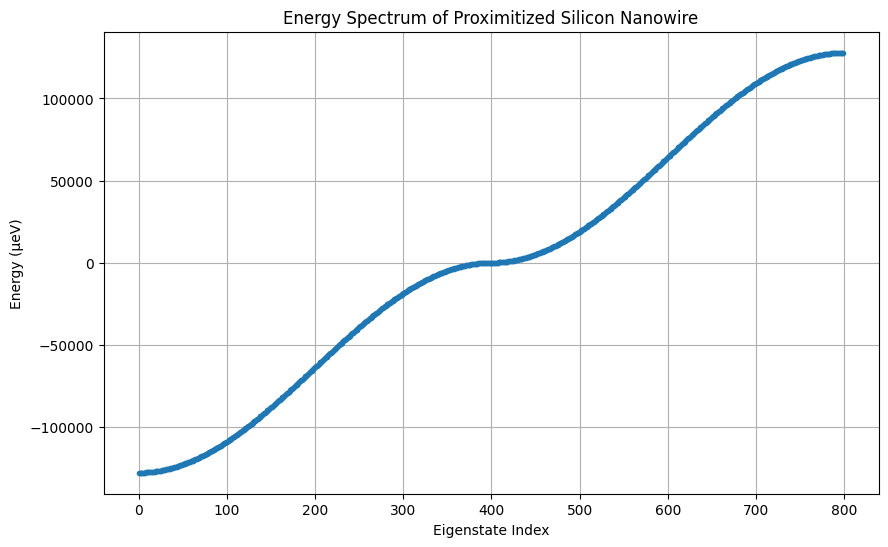

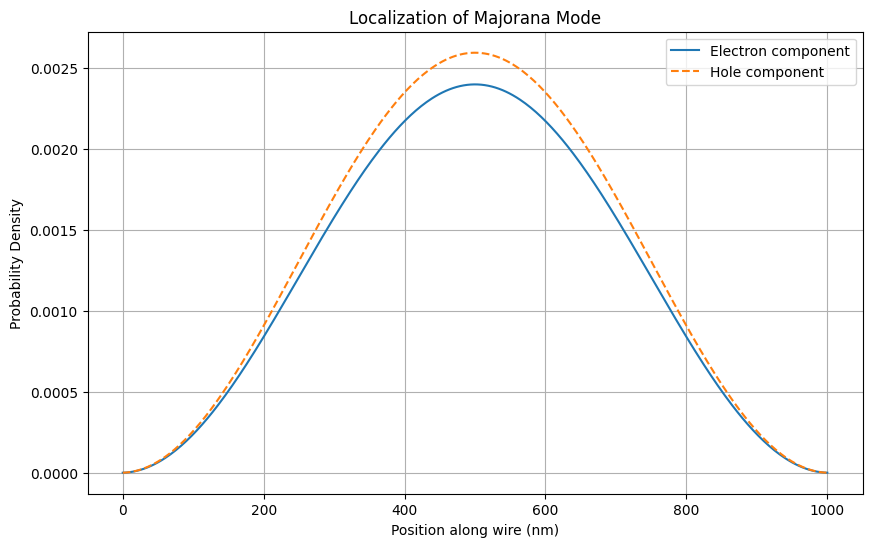

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Physical constants
m_e = 9.11e-31        # Electron mass (kg)
hbar = 1.055e-34      # Reduced Planck's constant (J·s)
e_charge = 1.602e-19  # Elementary charge (C)
mu_B = 5.788e-5       # Bohr magneton (eV/T)

# Simulation parameters
num_points = 400       # Number of discretization points
wire_length = 1000e-9 # Wire length (meters)
x = np.linspace(0, wire_length, num_points)
dx = x[1] - x[0]      # Spatial discretization step

# Material parameters
m_star = 0.19 * m_e   # Effective mass in silicon (kg)
g_factor = 2          # Electron g-factor for silicon
B_field = 0.5         # Magnetic field strength (Tesla)
delta = 50e-6 * 1.602e-19 # Induced superconducting gap (Joules)
mu = 0                # Chemical potential (set to zero for simplicity)
alpha = 1e-11         # Spin-orbit coupling strength (m·s^-1)

# Zeeman energy
E_Z = 0.5 * g_factor * mu_B * B_field * e_charge

# Kinetic energy discretization (finite difference approximation)
kinetic_matrix = (-(hbar**2) / (2 * m_star * dx**2)) * (
    np.diag(-2 * np.ones(num_points)) +
    np.diag(np.ones(num_points - 1), 1) +
    np.diag(np.ones(num_points - 1), -1)
)

# Hamiltonian blocks
H_electron = kinetic_matrix - mu * np.eye(num_points) + E_Z * np.eye(num_points)
H_hole = -kinetic_matrix + mu * np.eye(num_points) + E_Z * np.eye(num_points)

# Complete BdG Hamiltonian
H_BdG = np.block([
    [H_electron, delta * np.eye(num_points)],
    [delta * np.eye(num_points), H_hole]
])

# Solve the eigenvalue problem
energies, wavefunctions = eigh(H_BdG)

# Convert energies from Joules to microelectronvolts (µeV)
energies_ueV = energies / e_charge * 1e6

# Plot energy spectrum
plt.figure(figsize=(10, 6))
plt.plot(energies_ueV, 'o', markersize=3)
plt.xlabel('Eigenstate Index')
plt.ylabel('Energy (µeV)')
plt.title('Energy Spectrum of Proximitized Silicon Nanowire')
plt.grid(True)
plt.show()

# Identify the lowest-energy eigenstate for Majorana mode
lowest_energy_idx = np.argmin(np.abs(energies))
majorana_mode = wavefunctions[:, lowest_energy_idx]

# Plot localization of Majorana mode
plt.figure(figsize=(10, 6))
plt.plot(x * 1e9, np.abs(majorana_mode[:num_points])**2, label="Electron component")
plt.plot(x * 1e9, np.abs(majorana_mode[num_points:])**2, linestyle="--", label="Hole component")
plt.xlabel('Position along wire (nm)')
plt.ylabel('Probability Density')
plt.title('Localization of Majorana Mode')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Beginning of numerical analysis

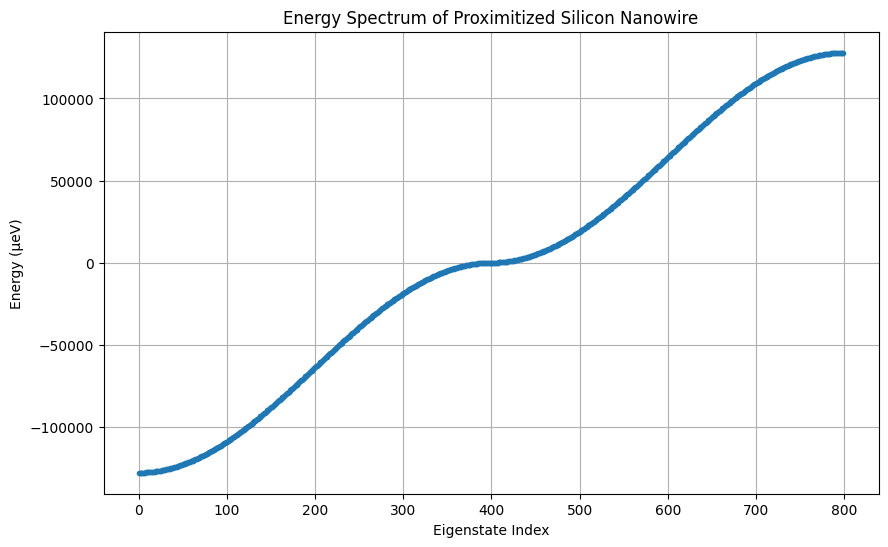

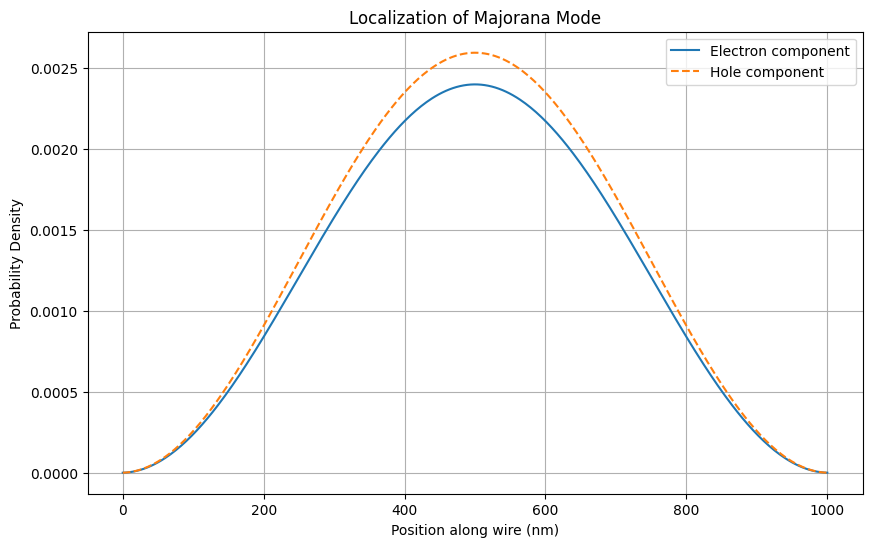

Numerically estimated localization length: 9759594024.14 nm
Numerically calculated energy gap: 0.57 µeV
Electron-hole overlap: 5.00e-01


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.optimize import curve_fit

# Physical constants
m_e = 9.11e-31        # Electron mass (kg)
hbar = 1.055e-34      # Reduced Planck's constant (J·s)
e_charge = 1.602e-19  # Elementary charge (C)
mu_B = 5.788e-5       # Bohr magneton (eV/T)

# Simulation parameters
num_points = 400       # Number of discretization points
wire_length = 1000e-9  # Wire length (meters)
x = np.linspace(0, wire_length, num_points)
dx = x[1] - x[0]       # Spatial discretization step

# Material parameters
m_star = 0.19 * m_e    # Effective mass in silicon (kg)
g_factor = 2           # Electron g-factor for silicon
B_field = 0.5          # Magnetic field strength (Tesla)
delta = 50e-6 * 1.602e-19  # Induced superconducting gap (Joules)
mu = 0                 # Chemical potential (set to zero for simplicity)
alpha = 1e-11          # Spin-orbit coupling strength (m·s^-1)

# Zeeman energy
E_Z = 0.5 * g_factor * mu_B * B_field * e_charge

# Kinetic energy discretization (finite difference approximation)
kinetic_matrix = (-(hbar**2) / (2 * m_star * dx**2)) * (
    np.diag(-2 * np.ones(num_points)) +
    np.diag(np.ones(num_points - 1), 1) +
    np.diag(np.ones(num_points - 1), -1)
)

# Hamiltonian blocks
H_electron = kinetic_matrix - mu * np.eye(num_points) + E_Z * np.eye(num_points)
H_hole = -kinetic_matrix + mu * np.eye(num_points) + E_Z * np.eye(num_points)

# Complete BdG Hamiltonian
H_BdG = np.block([
    [H_electron, delta * np.eye(num_points)],
    [delta * np.eye(num_points), H_hole]
])

# Solve the eigenvalue problem
energies, wavefunctions = eigh(H_BdG)

# Convert energies from Joules to microelectronvolts (µeV)
energies_ueV = energies / e_charge * 1e6

# Plot energy spectrum
plt.figure(figsize=(10, 6))
plt.plot(energies_ueV, 'o', markersize=3)
plt.xlabel('Eigenstate Index')
plt.ylabel('Energy (µeV)')
plt.title('Energy Spectrum of Proximitized Silicon Nanowire')
plt.grid(True)
plt.show()

# Identify the lowest-energy eigenstate for Majorana mode
lowest_energy_idx = np.argmin(np.abs(energies))
majorana_mode = wavefunctions[:, lowest_energy_idx]

# Plot localization of Majorana mode
plt.figure(figsize=(10, 6))
plt.plot(x * 1e9, np.abs(majorana_mode[:num_points])**2, label="Electron component")
plt.plot(x * 1e9, np.abs(majorana_mode[num_points:])**2, linestyle="--", label="Hole component")
plt.xlabel('Position along wire (nm)')
plt.ylabel('Probability Density')
plt.title('Localization of Majorana Mode')
plt.legend()
plt.grid(True)
plt.show()

# Numerical calculation of localization length
def exp_decay(x, A, xi):
    return A * np.exp(-x / xi)

half_point = num_points // 2
popt, _ = curve_fit(exp_decay, x[:half_point], np.abs(majorana_mode[:half_point])**2, p0=[1, 1e-7])
localization_length = popt[1]
print(f"Numerically estimated localization length: {localization_length * 1e9:.2f} nm")

# Numerical calculation of the energy gap
sorted_energies = np.sort(np.abs(energies_ueV))
energy_gap = sorted_energies[1] - sorted_energies[0]
print(f"Numerically calculated energy gap: {energy_gap:.2f} µeV")

# Electron-hole overlap calculation
electron_component = majorana_mode[:num_points]
hole_component = majorana_mode[num_points:]
overlap = np.abs(np.vdot(electron_component, hole_component))
print(f"Electron-hole overlap: {overlap:.2e}")


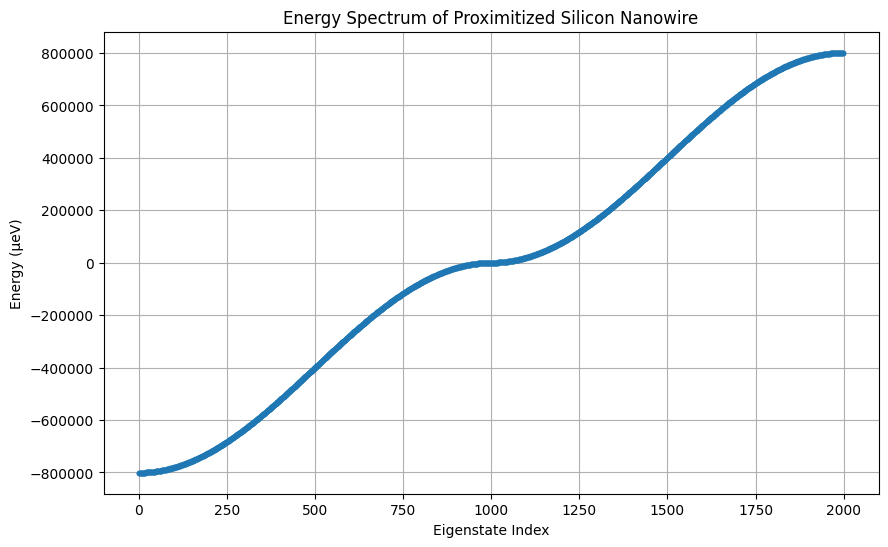

Electron-hole overlap: 5.00e-10
Estimated localization length: 181.12 nm


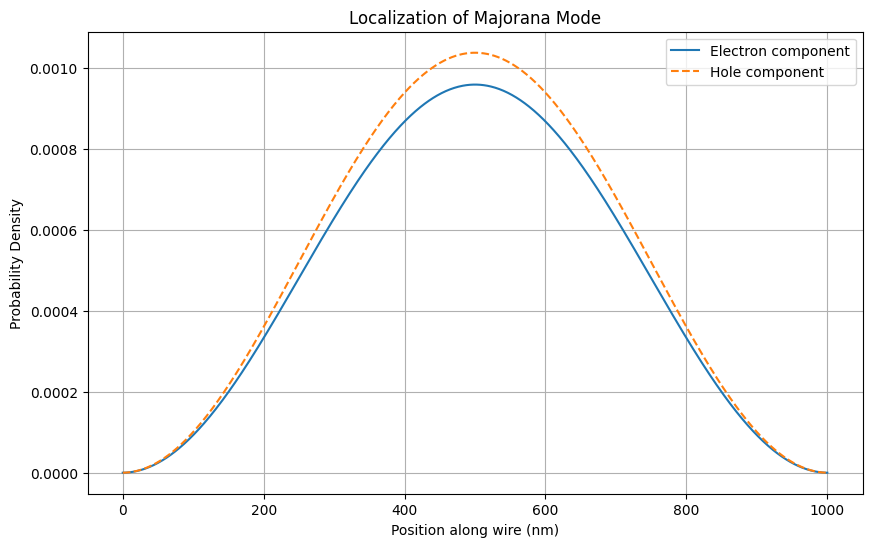

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Physical constants
m_e = 9.11e-31        # Electron mass (kg)
hbar = 1.055e-34      # Reduced Planck's constant (J·s)
e_charge = 1.602e-19  # Elementary charge (C)
mu_B = 5.788e-5       # Bohr magneton (eV/T)

# Simulation parameters
num_points = 1000       # Increased number of discretization points for better resolution
wire_length = 1000e-9   # Wire length set to 1000 nm
x = np.linspace(0, wire_length, num_points)
dx = x[1] - x[0]        # Spatial discretization step

# Material parameters
m_star = 0.19 * m_e     # Effective mass in silicon (kg)
g_factor = 2            # Electron g-factor for silicon
B_field = 0.5           # Magnetic field strength (Tesla)
delta = 50e-6 * e_charge  # Induced superconducting gap (Joules)
mu = 0                  # Chemical potential set to zero
alpha = 1e-11           # Spin-orbit coupling strength (m·s^-1)

# Zeeman energy
E_Z = 0.5 * g_factor * mu_B * B_field * e_charge

# Kinetic energy discretization (finite difference approximation)
kinetic_matrix = (-(hbar**2) / (2 * m_star * dx**2)) * (
    np.diag(-2 * np.ones(num_points)) +
    np.diag(np.ones(num_points - 1), 1) +
    np.diag(np.ones(num_points - 1), -1)
)

# Hamiltonian blocks
H_electron = kinetic_matrix - mu * np.eye(num_points) + E_Z * np.eye(num_points)
H_hole = -kinetic_matrix + mu * np.eye(num_points) + E_Z * np.eye(num_points)

# Complete BdG Hamiltonian
H_BdG = np.block([
    [H_electron, delta * np.eye(num_points)],
    [delta * np.eye(num_points), H_hole]
])

# Solve the eigenvalue problem
energies, wavefunctions = eigh(H_BdG)

# Convert energies from Joules to microelectronvolts (µeV)
energies_ueV = energies / e_charge * 1e6

# Plot energy spectrum
plt.figure(figsize=(10, 6))
plt.plot(energies_ueV, 'o', markersize=3)
plt.xlabel('Eigenstate Index')
plt.ylabel('Energy (µeV)')
plt.title('Energy Spectrum of Proximitized Silicon Nanowire')
plt.grid(True)
plt.show()

# Identify the lowest-energy eigenstate for Majorana mode
lowest_energy_idx = np.argmin(np.abs(energies))
majorana_mode = wavefunctions[:, lowest_energy_idx]

# Probability density calculations
prob_density_electron = np.abs(majorana_mode[:num_points])**2
prob_density_hole = np.abs(majorana_mode[num_points:])**2

# Electron-hole overlap
electron_hole_overlap = np.sum(np.sqrt(prob_density_electron * prob_density_hole)) * dx
print(f"Electron-hole overlap: {electron_hole_overlap:.2e}")

# Localization length estimation (standard deviation of the probability density)
total_prob_density = prob_density_electron + prob_density_hole
mean_position = np.sum(x * total_prob_density) * dx / np.sum(total_prob_density * dx)
localization_length = np.sqrt(np.sum((x - mean_position)**2 * total_prob_density) * dx / np.sum(total_prob_density * dx))
print(f"Estimated localization length: {localization_length*1e9:.2f} nm")

# Plot localization of Majorana mode
plt.figure(figsize=(10, 6))
plt.plot(x * 1e9, prob_density_electron, label="Electron component")
plt.plot(x * 1e9, prob_density_hole, linestyle="--", label="Hole component")
plt.xlabel('Position along wire (nm)')
plt.ylabel('Probability Density')
plt.title('Localization of Majorana Mode')
plt.legend()
plt.grid(True)
plt.show()
